# Setup

In [1]:
%%capture
%pip install git+https://github.com/neelnanda-io/TransformerLens.git
!pip install faker

In [1]:
#NOTE::This should print out the environment you are currently using!
import sys
print(sys.executable)

/home/ubuntu/new_venv/bin/python


In [2]:
import torch
from typing import Optional
import copy

import pickle
import matplotlib.pyplot as plt

In [3]:
import transformer_lens.utils as utils  # for test prompts
from transformer_lens import HookedTransformer
torch.set_grad_enabled(False)

/home/ubuntu/new_venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load Model

In [4]:
model = HookedTransformer.from_pretrained(
    "gpt2-small",
    center_unembed=True,
    center_writing_weights=True,
    fold_ln=True,
    refactor_factored_attn_matrices=True,
)

Loaded pretrained model gpt2-small into HookedTransformer


## Import functions from repo

In [5]:
# !git clone https://github.com/apartresearch/seqcont_circuits.git
#TODO::replace with your path
# %cd ../../src/generate_data
sys.path.append("../../src/generate_data")

In [6]:
from importlib import reload
import generate_data
reload(generate_data)
# from generate_data import *

<module 'generate_data' from '/home/ubuntu/seqcont_circuits/notebooks/gpt2_expms/../../src/generate_data/generate_data.py'>

# names

In [7]:
# sequence_name = "numerals_step_3" # TODO::replace with the name of the dictionary you create in generate_data.py
# sequence_name = "numerals_times_2" 
sequence_name = "numerals_alternate" 

In [8]:
# file_name = '/jet/home/mjain4/Project/seqcont_circuits/data/numwords/numwords_prompts_names.pkl' #TODO::replace with correct path
file_name = '../../data/numwords/numwords_prompts_names.pkl' 
with open(file_name, 'rb') as file:
    prompts_list = pickle.load(file)

In [9]:
prompts_list = generate_data.replace_nw_seqtype(prompts_list, sequence_name)

In [10]:
print(prompts_list)

[{'S1': '1', 'S2': '2', 'S3': '1', 'S4': '2', 'corr': ' 1', 'incorr': ' 2', 'text': 'Marcus born in 1. Victoria born in 2. George born in 1. Brandon born in 2. Jamie born in'}, {'S1': '2', 'S2': '1', 'S3': '2', 'S4': '1', 'corr': ' 2', 'incorr': ' 1', 'text': 'Mike born in 2. Jay born in 1. Arthur born in 2. Victoria born in 1. Eric born in'}, {'S1': '1', 'S2': '2', 'S3': '1', 'S4': '2', 'corr': ' 1', 'incorr': ' 2', 'text': 'Andre born in 1. Jack born in 2. Jose born in 1. Stephen born in 2. Allen born in'}, {'S1': '2', 'S2': '1', 'S3': '2', 'S4': '1', 'corr': ' 2', 'incorr': ' 1', 'text': 'Gene born in 2. Jamie born in 1. Tyler born in 2. Marc born in 1. Jessica born in'}, {'S1': '1', 'S2': '2', 'S3': '1', 'S4': '2', 'corr': ' 1', 'incorr': ' 2', 'text': 'Henry born in 1. Danny born in 2. Jon born in 1. Charles born in 2. Keith born in'}, {'S1': '2', 'S2': '1', 'S3': '2', 'S4': '1', 'corr': ' 2', 'incorr': ' 1', 'text': 'Donald born in 2. Connor born in 1. Jim born in 2. Jack born in

In [11]:
good_prompts, all_probs = generate_data.get_good_prompts_numerals(model, prompts_list[:1])

answer=

 1

incor=

 2

toks = 

[' 2', ' 1', ' 3', ' 4', ' 5', ' 6', ' 0', ' 7', ' 9', ' 8']

incor_ind =

0

probs = 

tensor([0.3954, 0.3482, 0.1738, 0.0251, 0.0160, 0.0077, 0.0065, 0.0040, 0.0023,
        0.0020], device='cuda:0')


In [12]:
%pwd

'/home/ubuntu/seqcont_circuits/notebooks/gpt2_expms'

In [ ]:
# #TODO::replace with correct path
# # with open(f'../../data/{sequence_name}/{sequence_name}_prompts_names.pkl', 'wb') as file:
# with open("/home/ubuntu/seqcont_circuits/data/numerals_alternate/numerals_alternate_prompts_names.pkl", 'wb') as file:
#     pickle.dump(good_prompts, file)
import os

output_path = f"../../data/{sequence_name}"
os.makedirs(output_path, exist_ok=True)

with open(f"{output_path}/{sequence_name}_prompts_names.pkl", 'wb') as file:
    pickle.dump(good_prompts, file)


NameError: name 'os' is not defined

Text(0.5, 1.0, 'Distribution')

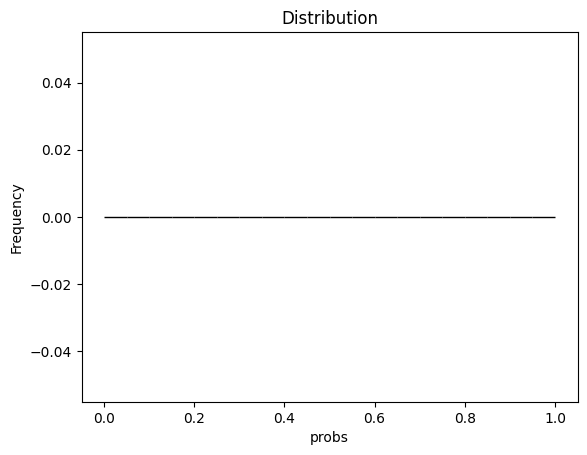

In [12]:
plt.hist([probs[0].item() for probs in all_probs], bins = 20, edgecolor='black')
plt.xlabel('probs')
plt.ylabel('Frequency')
plt.title('Distribution')

# lost

In [21]:
file_name = '/jet/home/mjain4/Project/seqcont_circuits/data/numwords/numwords_prompts_lost.pkl'  #TODO::replace with your path
with open(file_name, 'rb') as file:
    prompts_list = pickle.load(file)

In [22]:
prompts_list = replace_nw_seqtype(prompts_list, sequence_name)

In [23]:
good_prompts, all_probs = get_good_prompts_numerals(model, prompts_list)

In [24]:
#TODO::replace with correct path
with open(f'/jet/home/mjain4/Project/seqcont_circuits/data/{sequence_name}/{sequence_name}_prompts_lost.pkl', 'wb') as file:
    pickle.dump(good_prompts, file)

Text(0.5, 1.0, 'Distribution')

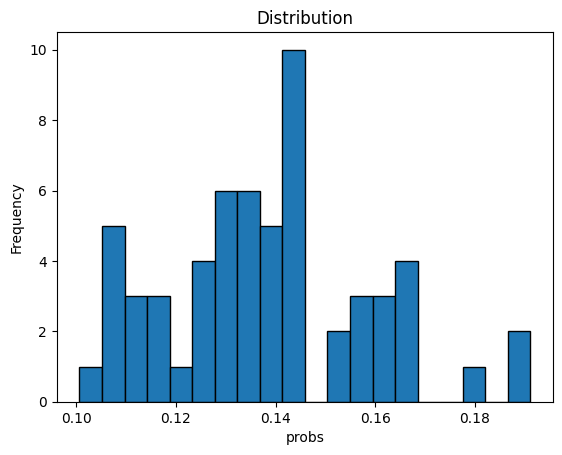

In [25]:
plt.hist([probs[0].item() for probs in all_probs], bins = 20, edgecolor='black')
plt.xlabel('probs')
plt.ylabel('Frequency')
plt.title('Distribution')

# done

In [26]:
file_name = '/jet/home/mjain4/Project/seqcont_circuits/data/numwords/numwords_prompts_done.pkl' #TODO::replace with correct path
with open(file_name, 'rb') as file:
    prompts_list = pickle.load(file)

In [27]:
prompts_list = replace_nw_seqtype(prompts_list, sequence_name)

In [28]:
good_prompts, all_probs = get_good_prompts_numerals(model, prompts_list)

In [37]:
# only run if the text doesn't have "___ done in ___". I ran into the issue where the text was instead "___ d2 in ___"
for prompt in good_prompts:
    text = prompt['text']
    corrected_text = text.replace("d1", "done")
    prompt['text'] = corrected_text

In [38]:
#TODO::replace with correct path
with open(f'/jet/home/mjain4/Project/seqcont_circuits/data/{sequence_name}/{sequence_name}_prompts_done.pkl', 'wb') as file:
    pickle.dump(good_prompts, file)

Text(0.5, 1.0, 'Distribution')

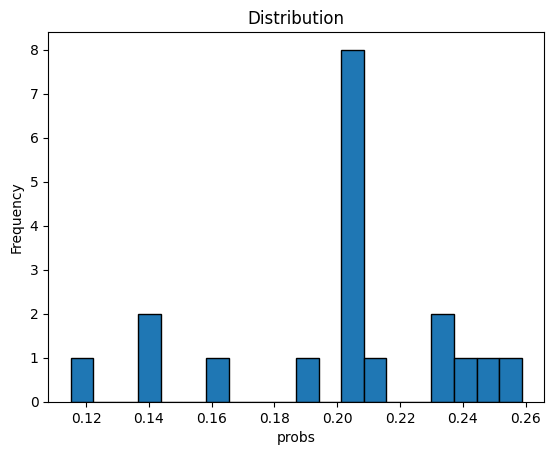

In [39]:
plt.hist([probs[0].item() for probs in all_probs], bins = 20, edgecolor='black')
plt.xlabel('probs')
plt.ylabel('Frequency')
plt.title('Distribution')

In [41]:
#TODO::replace with correct path for all 3
file_name = f'/jet/home/mjain4/Project/seqcont_circuits/data/{sequence_name}/{sequence_name}_prompts_done.pkl'
with open(file_name, 'rb') as file:
    prompts_list_done = pickle.load(file)
    
file_name = f'/jet/home/mjain4/Project/seqcont_circuits/data/{sequence_name}/{sequence_name}_prompts_lost.pkl'
with open(file_name, 'rb') as file:
    prompts_list_lost = pickle.load(file)
    
file_name = f'/jet/home/mjain4/Project/seqcont_circuits/data/{sequence_name}/{sequence_name}_prompts_names.pkl'
with open(file_name, 'rb') as file:
    prompts_list_names = pickle.load(file)

In [42]:
# Truncate prompt lists to match size of smallest prompt list
min_len = min(len(prompts_list_done), len(prompts_list_lost), len(prompts_list_names))
prompts_list_done = prompts_list_done[:min_len]
prompts_list_lost = prompts_list_lost[:min_len]
prompts_list_names = prompts_list_names[:min_len]

In [44]:
output_done = generate_prompts_list_corr(prompts_list_done)
output_lost = generate_prompts_list_corr(prompts_list_lost)
output_names = generate_prompts_list_corr(prompts_list_names)

In [45]:
output = []
output.extend(output_done)
output.extend(output_lost)
output.extend(output_names)

In [25]:
# save random prompts
with open(f'/jet/home/mjain4/Project/seqcont_circuits/data/{sequence_name}/randDS_{sequence_name}.pkl', 'wb') as file:
    pickle.dump(output, file)

In [26]:
# resave names, done, and list prompts using the truncated lists
with open(f'/jet/home/mjain4/seqcont_circuits/data/{sequence_name}/{sequence_name}_prompts_done.pkl', 'wb') as file:
    pickle.dump(prompts_list_done, file)
with open(f'/jet/home/mjain4/seqcont_circuits/data/{sequence_name}/{sequence_name}_prompts_lost.pkl', 'wb') as file:
    pickle.dump(prompts_list_lost, file)
with open(f'/jet/home/mjain4/seqcont_circuits/data/{sequence_name}/{sequence_name}_prompts_names.pkl', 'wb') as file:
    pickle.dump(prompts_list_names, file)